In [16]:
import ee
import geemap
from geeRiverCL import *
import numpy as np
geemap.ee_initialize()

In [36]:
import matplotlib.pyplot as plt

In [17]:
bandnames = ['Red', 'Green', 'Blue', 'NIR', 'SWIR1']
img87 = ee.Image('LANDSAT/LT05/C02/T1_L2/LT05_023037_19871015').select(['SR_B3', 'SR_B2', 'SR_B1', 'SR_B4', 'SR_B5']).multiply(0.0000275).add(-0.2).rename(bandnames)
img92 = ee.Image('LANDSAT/LT05/C02/T1_L2/LT05_023037_19921012').select(['SR_B3', 'SR_B2', 'SR_B1', 'SR_B4', 'SR_B5']).multiply(0.0000275).add(-0.2).rename(bandnames)
img95 = ee.Image('LANDSAT/LT05/C02/T1_L2/LT05_023037_19951021').select(['SR_B3', 'SR_B2', 'SR_B1', 'SR_B4', 'SR_B5']).multiply(0.0000275).add(-0.2).rename(bandnames)
img01 = ee.Image('LANDSAT/LE07/C02/T1_L2/LE07_023037_20011029').select(['SR_B3', 'SR_B2', 'SR_B1', 'SR_B4', 'SR_B5']).multiply(0.0000275).add(-0.2).rename(bandnames)
img05 = ee.Image('LANDSAT/LT05/C02/T1_L2/LT05_023037_20051016').select(['SR_B3', 'SR_B2', 'SR_B1', 'SR_B4', 'SR_B5']).multiply(0.0000275).add(-0.2).rename(bandnames)
img10 = ee.Image('LANDSAT/LT05/C02/T1_L2/LT05_023037_20101014').select(['SR_B3', 'SR_B2', 'SR_B1', 'SR_B4', 'SR_B5']).multiply(0.0000275).add(-0.2).rename(bandnames)
img15 = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_023037_20151113').select(['SR_B4', 'SR_B3', 'SR_B2', 'SR_B5', 'SR_B6']).multiply(0.0000275).add(-0.2).rename(bandnames)
img20 = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_023037_20201126').select(['SR_B4', 'SR_B3', 'SR_B2', 'SR_B5', 'SR_B6']).multiply(0.0000275).add(-0.2).rename(bandnames)


In [18]:
roi = ee.FeatureCollection("users/luoyee1997/geeRiver/Arkansas/roi").geometry()

In [19]:
sclLS = 30
class87md = classification(img87, sclLS, method='minDis')
class92md = classification(img92, sclLS, method='minDis')
class95md = classification(img95, sclLS, method='minDis')
class01md = classification(img01, sclLS, method='minDis')
class05md = classification(img05, sclLS, method='minDis')
class10md = classification(img10, sclLS, method='minDis')
class15md = classification(img15, sclLS, method='minDis')
class20md = classification(img20, sclLS, method='minDis')

In [20]:
Map = geemap.Map()

In [21]:
trueColor321Vis = {
  'gamma': [0.95*1.5, 1.1*1.5, 1*1.5]
};
Map.addLayer(img87.clip(roi), trueColor321Vis, 'img87')
Map.addLayer(img92.clip(roi), trueColor321Vis, 'img92')
Map.addLayer(img95.clip(roi), trueColor321Vis, 'img95')
Map.addLayer(img01.clip(roi), trueColor321Vis, 'img01')
Map.addLayer(img05.clip(roi), trueColor321Vis, 'img05')
Map.addLayer(img10.clip(roi), trueColor321Vis, 'img10')
Map.addLayer(img15.clip(roi), trueColor321Vis, 'img15')
Map.addLayer(img20.clip(roi), trueColor321Vis, 'img20')

In [22]:
Map.addLayer(class87md.clip(roi), {'min':1, 'max':3, 'palette': ['#0080FF', 'red', 'green']}, 'class87md')
Map.addLayer(class92md.clip(roi), {'min':1, 'max':3, 'palette': ['#0080FF', 'red', 'green']}, 'class92md')
Map.addLayer(class95md.clip(roi), {'min':1, 'max':3, 'palette': ['#0080FF', 'red', 'green']}, 'class95md')
Map.addLayer(class01md.clip(roi), {'min':1, 'max':3, 'palette': ['#0080FF', 'red', 'green']}, 'class01md')
Map.addLayer(class05md.clip(roi), {'min':1, 'max':3, 'palette': ['#0080FF', 'red', 'green']}, 'class05md')
Map.addLayer(class10md.clip(roi), {'min':1, 'max':3, 'palette': ['#0080FF', 'red', 'green']}, 'class10md')
Map.addLayer(class15md.clip(roi), {'min':1, 'max':3, 'palette': ['#0080FF', 'red', 'green']}, 'class15md')
Map.addLayer(class20md.clip(roi), {'min':1, 'max':3, 'palette': ['#0080FF', 'red', 'green']}, 'class20md')

In [23]:
ndvi87 = img87.normalizedDifference(['NIR', 'Red']).rename('NDVI')
ndvi92 = img92.normalizedDifference(['NIR', 'Red']).rename('NDVI')
ndvi95 = img95.normalizedDifference(['NIR', 'Red']).rename('NDVI')
ndvi01 = img01.normalizedDifference(['NIR', 'Red']).rename('NDVI')
ndvi05 = img05.normalizedDifference(['NIR', 'Red']).rename('NDVI')
ndvi10 = img10.normalizedDifference(['NIR', 'Red']).rename('NDVI')
ndvi15 = img15.normalizedDifference(['NIR', 'Red']).rename('NDVI')
ndvi20 = img20.normalizedDifference(['NIR', 'Red']).rename('NDVI')

In [24]:
def plot_hist(img, ltb, name, scale=3, alpha=0.8):
    my_sample = img.clip(ltb).sample(ltb, numPixels=5000, scale=scale)
    l = my_sample.getInfo()['features']
    stat = [i['properties'][name] for i in l]
    plt.hist(stat, density=True, bins=100, alpha=alpha)

In [34]:
ndvi87.clip(roi).sample(roi, numPixels=5000, scale=30).getInfo()['features'][0]['properties']

{'type': 'Feature',
 'geometry': None,
 'id': '0',
 'properties': {'NDVI': -0.18914877710135647}}

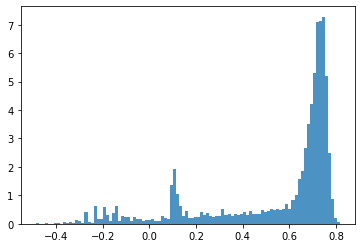

In [39]:
plot_hist(ndvi87, roi, 'NDVI', scale=30);

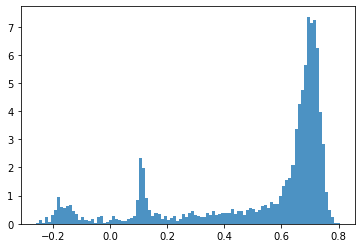

In [40]:
plot_hist(ndvi92, roi, 'NDVI', scale=30);

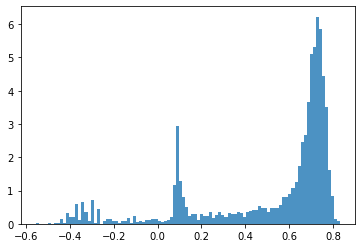

In [41]:
plot_hist(ndvi95, roi, 'NDVI', scale=30);

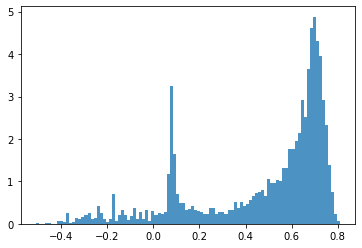

In [42]:
plot_hist(ndvi01, roi, 'NDVI', scale=30);

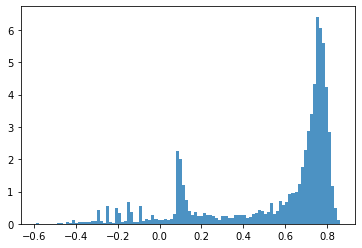

In [43]:
plot_hist(ndvi05, roi, 'NDVI', scale=30);

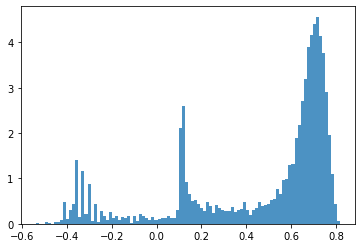

In [44]:
plot_hist(ndvi10, roi, 'NDVI', scale=30);

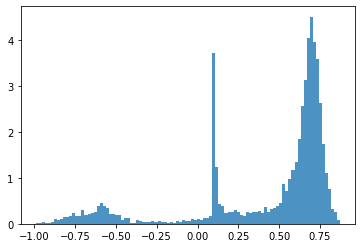

In [45]:
plot_hist(ndvi15, roi, 'NDVI', scale=30);

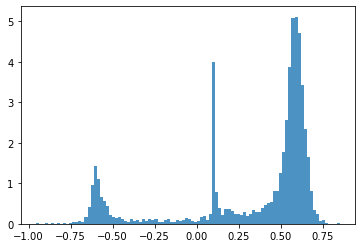

In [46]:
plot_hist(ndvi20, roi, 'NDVI', scale=30);

In [8]:
Map.addLayer(class15md.clip(roi), {'min':1, 'max':3, 'palette': ['#0080FF', 'red', 'green']}, 'class15md')

In [9]:
collection1 = ee.ImageCollection.fromImages([img87, img92, img01, img05, img10, img15, img20])

In [10]:
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [11]:
Map.addLayer(class20rf.clip(roi).eq(2).selfMask(), {'palette': ['red']}, 'class20rf')

NameError: name 'class20rf' is not defined

In [ ]:
Map.addLayer(class20rf2.clip(roi).eq(2).selfMask(), {'palette': ['yellow']}, 'class20rf1')

In [ ]:
ndvi20 = img20.normalizedDifference(['NIR', 'Red']).rename('NDVI')
evi20 = Evi(img20).rename('EVI')
ndwi20 = img20.normalizedDifference(['Green', 'NIR']).rename('NDWI')

In [ ]:
Map.addLayer(ndvi20.clip(roi).lt(0.2).And(ndvi20.gt(0.1)).selfMask(), {}, 'ndvi20')

In [ ]:
Map.addLayer(ndvi20.lt(0).clip(roi).selfMask(), {'palette': 'blue'}, 'ndvi')

In [ ]:
Map.addLayer(ndwi20.clip(roi).gt(0).selfMask(), {}, 'nd2i20')

In [ ]:
Map.addLayer(evi20.clip(roi).lt(0.2).selfMask(), {}, 'evi20')

In [ ]:
Map